In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets.mnist import load_data
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Normalization, Dropout
from keras.layers import Conv2D, MaxPool2D
import matplotlib.pyplot as plt


Step 1 - Load the dataset

Use the function load_data from the mnist module 


In [2]:
data = load_data()

In [3]:
np.shape(data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(2, 2)

The data is structured as two rows and two columns
1. The first row is the traning data and the second row is the testing data
2. The first column consists of images and the second column is the labels for the images.

In [4]:
#Unpack the data as follows - 
(train_images,train_labels),(test_images,test_labels) = data

In [5]:
#Print the first image which is stored as a numpy array and print its label
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train_labels[0]

5

In [7]:
#Print all the distinct labels. Use the inbuilt function set. This functioin takes a list or a tuple with only the unique values
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
#Properties of images in the MNIST dataset

print('Max pixel value : ', train_images[0].max())
print('Min pixel value : ', train_images[0].min())
print()
print('Shape of the training data : ', train_images.shape)
print('Shape of each training example : ', train_images[0].shape)
print()
print('Shape of the testing data : ', test_images.shape)
print('Shape of each testing example : ', test_images[0].shape)

Max pixel value :  255
Min pixel value :  0

Shape of the training data :  (60000, 28, 28)
Shape of each training example :  (28, 28)

Shape of the testing data :  (10000, 28, 28)
Shape of each testing example :  (28, 28)


In [9]:
#Print the pixel value directly
print('Label : ',train_labels[5])
print(train_images[10000,5:23,5:23])

Label :  2
[[  0   0   0   0  29 150 195 254 255 254 176 193 150  96   0   0   0   0]
 [  0   0  48 166 224 253 253 234 196 253 253 253 253 233   0   0   0   0]
 [ 93 244 249 253 187  46  10   8   4  10 194 253 253 233   0   0   0   0]
 [107 253 253 230  48   0   0   0   0   0 192 253 253 156   0   0   0   0]
 [  3  20  20  15   0   0   0   0   0  43 224 253 245  74   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 249 253 245 126   0   0   0   0   0]
 [  0   0   0   0   0   0  14 101 223 253 248 124   0   0   0   0   0   0]
 [  0   0   0   0  11 166 239 253 253 253 187  30   0   0   0   0   0   0]
 [  0   0   0   0  16 248 250 253 253 253 253 232 213 111   2   0   0   0]
 [  0   0   0   0   0   0  43  98  98 208 253 253 253 253 187  22   0   0]
 [  0   0   0   0   0   0   0   0   0   9  51 119 253 253 253  76   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1 183 253 253 139   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 182 253 253 104   0   0]
 [  0   0   0 

Step 2 - Visualize the dataset

Display few images from the training dataset with the corresponding label

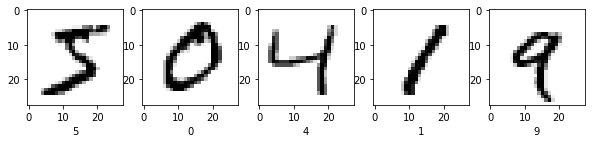

In [10]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

Step 3 - Data preprocessing

Scaling the data

Convert the pixel values which are in the range (0-255) to the range (0-1)

In [11]:
np.unique(train_images[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
#After scaling
np.unique(train_images[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

Step 4 - Build the model

Steps tot build the model:
1. Set up the input layer, hidden layer and the output layer
2. Compile the model


Setup the layers
The basic building block of a neural network (in the Keras library) is the layer. Each layer consists several perceptrons which are connected to the adjacent. We will not deal with the individual perceptrons when we use the Keras library. We shall consider a layer as a whole. 

The configuration of each layer depends of the data and the problem at hand. 

In [14]:
model = keras.Sequential([
                          
                        
                          keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                          keras.layers.MaxPool2D(pool_size=(2, 2)),
                          keras.layers.Flatten(input_shape = (28,28,1)),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(128,activation = 'relu'),
                          keras.layers.Dense(128,activation = 'relu'),
                          keras.layers.Dense(10,activation = 'softmax')
])


In [15]:
#Examine the structure of weights of the hidden layer


hidden_layer = model.layers[3]
weights = hidden_layer.get_weights()
print('Shape of weights : ',np.shape(weights[0]))
print('Shape of biases : ', np.shape(weights[1]))


Shape of weights :  (5408, 512)
Shape of biases :  (512,)


In [16]:
#Examine the structure of weights of the hidden layer



hidden_layer = model.layers[4]
weights = hidden_layer.get_weights()
print('Shape of weights : ',np.shape(weights[0]))
print('Shape of biases : ' , np.shape(weights[1]))

Shape of weights :  (512, 128)
Shape of biases :  (128,)


Compile the Model 

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step: 

* Loss Function - This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
We will use Sparse Categorical Entropy as the loss function.

* Optimizer - This is how the model is updated based on the data it sees and its loss function. We will use Stocastic Gradient Descent (SGD) optimizer. 

* Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. 


In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Train the model

Training the neural network requires the following steps - 
1. Feed the training data to the model - in the example, the train_images and train_labels arrays. 
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set - in this example, the test_images array. WE verify that the perdictions match the labels from the test_labels array.

To start training, call the model.fit method - the model is "fit" to the training data:

In [18]:
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 100, validation_data=(test_images, test_labels))

Epoch 1/5
600/600 [==============================] - 48s 80ms/step - loss: 0.1667 - accuracy: 0.9487 - val_loss: 0.0767 - val_accuracy: 0.9771
Epoch 2/5
600/600 [==============================] - 47s 79ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0586 - val_accuracy: 0.9804
Epoch 3/5
600/600 [==============================] - 47s 79ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0545 - val_accuracy: 0.9834
Epoch 4/5
600/600 [==============================] - 47s 79ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0598 - val_accuracy: 0.9836
Epoch 5/5
600/600 [==============================] - 47s 79ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0604 - val_accuracy: 0.9823


Step 5 - Visualize the model training

Visualize validation loss against loss over the training data set per epoch

In [19]:
val_losses = history.history['val_loss']
losses = history.history['loss']
indices = range(len(losses))

plt.figure(figsize = (10,5))
plt.plot(indices, val_losses, color = 'r')
plt.plot(indices, losses, color = 'b')
plt.legend(['Validation loss', 'Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

Step 6 - Compute the accuracy and make predictions

Evaluate the model by computing the accuracy over testing data


In [20]:
 test_loss,test_acc = model.evaluate(test_images, test_labels)
 print('Test accuracy : ',test_acc)
 print("loss: ", test_loss)
 

313/313 [==============================] - 4s 12ms/step - loss: 0.0604 - accuracy: 0.9823
Test accuracy :  0.9822999835014343
loss:  0.06042030453681946


Make predictions

With the model trained, we can use it to make predictions about the images int the testing data.


In [21]:
predictions = (model.predict(test_images) > 0.5).astype("int32")


In [22]:
#Define a function to display image along with confidence levels

def plot_confidence(images,labels, predictions):
  plt.figure(figsize=(15,30))
  plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace = 0.4)
  plot_index = 0
  for i in range(len(images)):
    plot_index+=1;
    plt.subplot(len(images),2,plot_index)
    plt.imshow(images[i],cmap=plt.cm.binary)
    correct_label=str(labels[i])
    predicted_label = str(np.argmax(predictions[i]))
    title = 'Correct label : '+str(labels[i]) + '\n' + 'Predicted Label : ' +str(np.argmax(predictions[i]))

    if predicted_label != correct_label:
      plt.title(title,backgroundcolor = 'r', color = 'w')
    else:
      plt.title(title,backgroundcolor = 'g', color = 'w')
    plt.xticks([])
    plt.yticks([])

    plot_index +=1
    plt.subplot(len(images),2, plot_index)
    plt.bar(range(10),predictions[i])
    plt.xticks(range(10))
    plt.ylim(0,1)

Plot the first 10 images and the confidence levels from the testing data set


In [23]:
images = test_images[:10]
labels = test_labels[:10]
test_predictions = predictions[:10]
plot_confidence(images,labels, test_predictions)

Display the images that could not be classified correctly by the model

We can observe here that the handwritten digits are ambiguious. If you compare the predicted label and the true label you will see the similarities between the predicted number and the actual number. 

Number of incorrectly classified images :  185


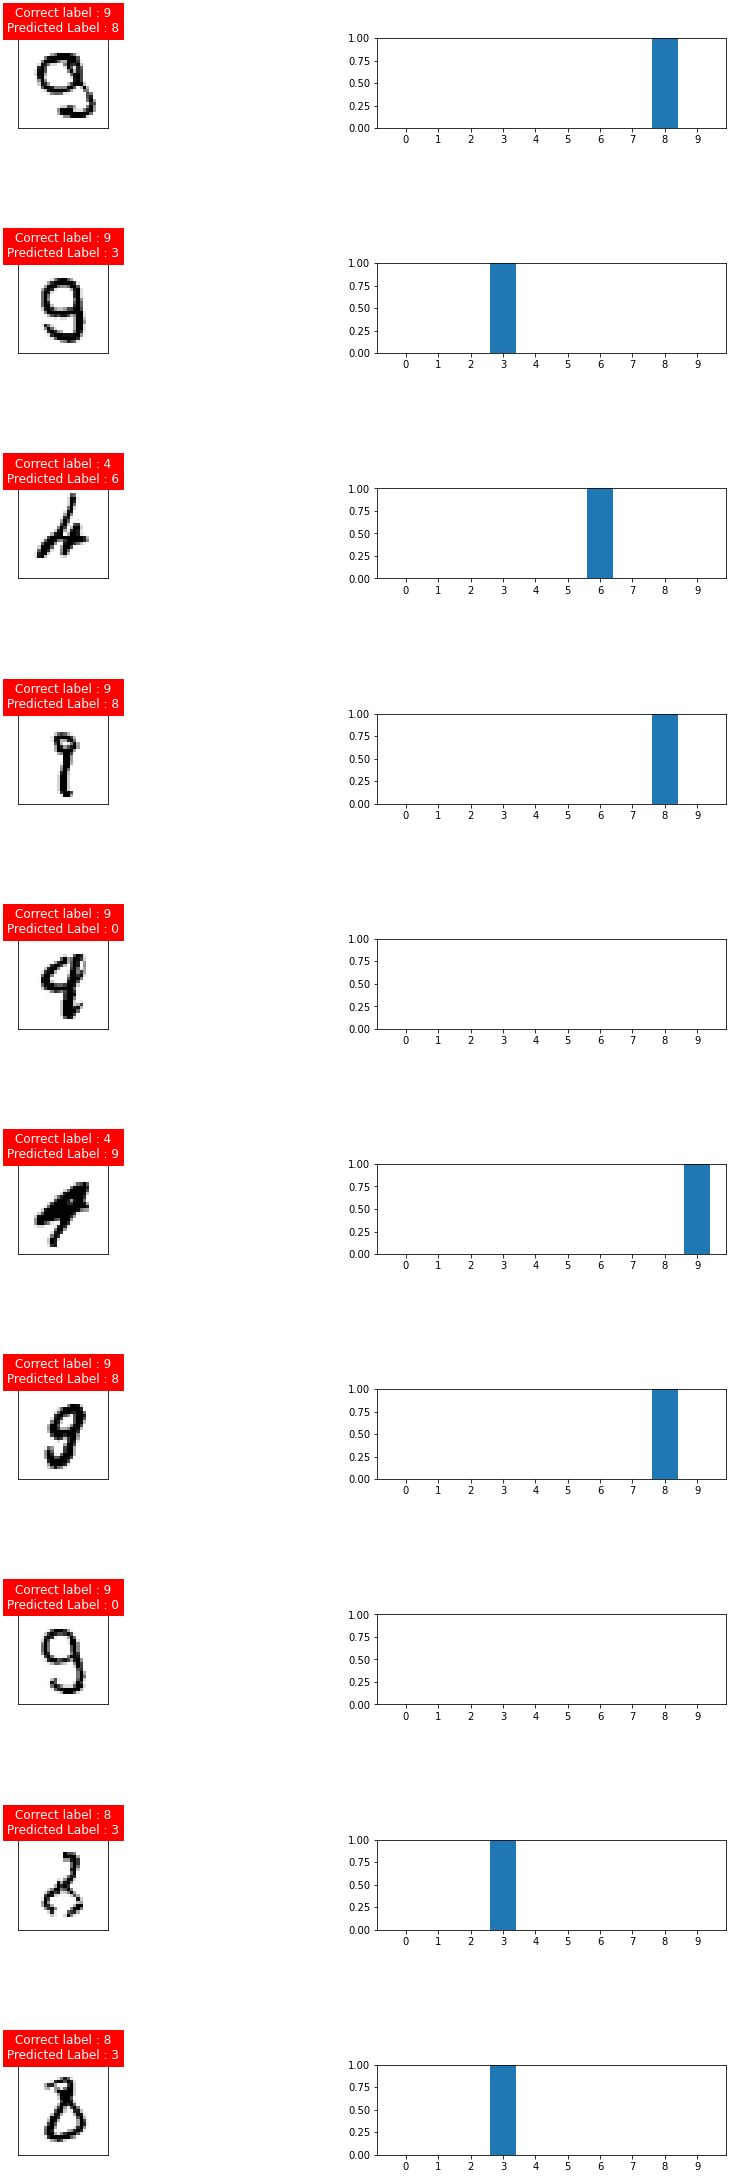

In [24]:
incorrect_indices = list()

for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  if predicted_label!= test_labels[i]:
    incorrect_indices.append(i)
print('Number of incorrectly classified images : ', len(incorrect_indices))

incorrect_indices = incorrect_indices[:10]

incorrect_images = [test_images[i] for i in incorrect_indices]
incorrect_labels = [test_labels[i] for i in incorrect_indices]
incorrect_predictions = [predictions[i] for i in incorrect_indices]

plot_confidence(incorrect_images, incorrect_labels,incorrect_predictions)

In [30]:
model.summary() #Summary of model
model.save('MNIST_1.77%_Jagmohan_Meher.h5') #Save model in HDF5 format

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                        

In [31]:
from google.colab import files
files.download('MNIST_1.77%_Jagmohan_Meher.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
a = (1 - test_acc)*100

print (a)

1.7700016498565674
